In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [11]:
#%% Load Data
train = pd.read_csv(r"C:\Users\Robby\Desktop\IAA\Personal Projects\WiDS\TrainingWiDS2021.csv")
train = train.iloc[:,1:]

In [12]:
#%% Split into training and validation
from sklearn.model_selection import train_test_split as tts
y = train['diabetes_mellitus']
x = train.drop('diabetes_mellitus', axis=1)
train_x, valid_x, train_y, valid_y = tts(x,y, test_size = .25, random_state = 42)

In [5]:
train_x.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
99191,240674,203,79.0,22.460938,1,Caucasian,F,160.0,NaN,Operating Room / Recovery,975,admit,Med-Surg ICU,4.950000,0,57.5,1.9,304.0,1412.01,1,0,0.5,4.0,0.32,0.4,1.0,5.0,0.0,1.0,102.0,55.0,36.8,1,73.0,20.6,20.6,77.0,7.546,10.0,140.0,36.2,2120.6880,1,6.40,NaN,NaN,79.0,53.0,79.0,53.0,89.0,63.0,NaN,NaN,101.0,68.0,101.0,68.0,22.0,10.0,100.0,97.0,NaN,NaN,176.0,97.0,176.0,97.0,38.7,36.2,NaN,NaN,67.0,60.0,67.0,60.0,69.0,63.0,NaN,NaN,93.0,86.0,93.0,86.0,19.0,12.0,100.0,99.0,NaN,NaN,169.0,160.0,169.0,160.0,36.2,36.2,2.3,1.9,0.5,0.4,4.0,3.0,7.5,7.0,0.46,0.32,113.0,81.0,24.0,21.0,13.9,13.2,40.1,36.8,1.40,1.30,1.2,1.0,300.0,250.0,4.3,3.8,142.0,140.0,12.10,6.40,2.3,2.3,0.4,0.4,4.0,4.0,7.5,7.5,0.46,0.46,113.0,113.0,24.0,24.0,13.9,13.9,40.1,40.1,1.40,1.30,NaN,NaN,250.0,250.0,3.8,3.8,142.0,142.0,6.40,6.40,33.8,20.6,7.546,7.358,93.0,77.0,265.714286,192.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
46570,216335,21,67.0,50.117188,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,512,admit,CCU-CTICU,0.065972,0,128.3,NaN,117.0,106.01,0,0,NaN,32.0,1.19,NaN,4.0,6.0,0.0,5.0,235.0,38.0,32.8,0,57.0,NaN,NaN,NaN,NaN,14.0,1

In [8]:
train_x.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,97617.0,212846.837682,38180.104585,147000.000000,179676.000000,212833.000000,245977.000000,278998.000000
hospital_id,97617.0,106.156848,63.503628,1.000000,49.000000,112.000000,165.000000,204.000000
age,93890.0,61.923538,16.866503,0.000000,52.000000,64.000000,75.000000,89.000000
bmi,94261.0,29.103197,8.265616,14.844926,23.580247,27.548209,32.803127,67.814990
elective_surgery,97617.0,0.189270,0.391725,0.000000,0.000000,0.000000,0.000000,1.000000
height,96089.0,169.636942,10.819520,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,97617.0,662.686776,304.167384,82.000000,427.000000,653.000000,969.000000,1111.000000
pre_icu_los_days,97617.0,0.842991,2.488590,-0.244444,0.045833,0.155556,0.421528,175.627778
readmission_status,97617.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
weight,95006.0,83.808988,24.967131,38.600000,66.600000,80.000000,96.900000,186.000000


In [12]:
train_x.isna().mean().round(4).sort_values(ascending= False) * 100

h1_bilirubin_min               92.08
h1_bilirubin_max               92.08
h1_albumin_min                 91.42
h1_albumin_max                 91.42
h1_lactate_min                 91.03
h1_lactate_max                 91.03
h1_pao2fio2ratio_max           87.11
h1_pao2fio2ratio_min           87.11
h1_arterial_ph_min             82.87
h1_arterial_ph_max             82.87
h1_arterial_pco2_min           82.71
h1_arterial_pco2_max           82.71
h1_arterial_po2_min            82.55
h1_arterial_po2_max            82.55
h1_hco3_min                    81.73
h1_hco3_max                    81.73
h1_wbc_min                     81.44
h1_wbc_max                     81.44
h1_calcium_max                 81.36
h1_calcium_min                 81.36
h1_platelets_max               81.24
h1_platelets_min               81.24
h1_bun_min                     80.63
h1_bun_max                     80.63
h1_diasbp_invasive_max         80.54
h1_diasbp_invasive_min         80.54
h1_sysbp_invasive_max          80.52
h

 A lot of missing values. We will need to discuss whether we should impute or drop. I think we should impute with median, run a prelim model, check importance, than try to get better values for important columns (kNN imputation?)

In [27]:
suffix = [col[3:] for col in train_x if col.startswith('h1')]

In [33]:
vars = {}
for i in suffix:
    vars[i] = train_x[train_x['h1_'+i] == train_x['d1_'+i]][['h1_'+i,'d1_'+i]]
    print(vars[i])

        h1_diasbp_invasive_max  d1_diasbp_invasive_max
42432                     77.0                    77.0
79745                     98.0                    98.0
38837                     70.0                    70.0
94625                     61.0                    61.0
125510                    62.0                    62.0
...                        ...                     ...
17159                     59.0                    59.0
73969                     80.0                    80.0
84478                     75.0                    75.0
60263                     50.0                    50.0
119879                    66.0                    66.0

[5295 rows x 2 columns]
        h1_diasbp_invasive_min  d1_diasbp_invasive_min
79745                     76.0                    76.0
94625                     61.0                    61.0
125273                    29.0                    29.0
79495                     48.0                    48.0
101                       78.0          

[20243 rows x 2 columns]
        h1_resprate_min  d1_resprate_min
42432              10.0             10.0
108143             11.0             11.0
12259              16.0             16.0
14445              12.0             12.0
1583               28.0             28.0
...                 ...              ...
87498              12.0             12.0
54886              16.0             16.0
119879             14.0             14.0
128106             11.0             11.0
15795              13.0             13.0

[21378 rows x 2 columns]
        h1_spo2_max  d1_spo2_max
99191         100.0        100.0
42432         100.0        100.0
53279         100.0        100.0
108143         97.0         97.0
12259         100.0        100.0
...             ...          ...
119879        100.0        100.0
128106        100.0        100.0
103694        100.0        100.0
15795         100.0        100.0
121958        100.0        100.0

[49831 rows x 2 columns]
        h1_spo2_min  d1_spo2_min
46

[11405 rows x 2 columns]
        h1_creatinine_min  d1_creatinine_min
42432                1.00               1.00
61623                1.71               1.71
57318                0.98               0.98
79495                0.69               0.69
113421               1.60               1.60
...                   ...                ...
80038                0.54               0.54
769                  1.20               1.20
41090                2.50               2.50
860                  1.12               1.12
121958               0.96               0.96

[10077 rows x 2 columns]
        h1_glucose_max  d1_glucose_max
99191            113.0           113.0
14445            148.0           148.0
127586           184.0           184.0
97218            151.0           151.0
99376            172.0           172.0
...                ...             ...
16023            163.0           163.0
44131            176.0           176.0
6265             170.0           170.0
103694           38

[13668 rows x 2 columns]
        h1_wbc_max  d1_wbc_max
42432         6.95        6.95
126448       14.10       14.10
97218        14.70       14.70
96331        13.10       13.10
83582         8.30        8.30
...            ...         ...
121637       16.10       16.10
769           9.30        9.30
112727       11.70       11.70
860          20.40       20.40
121958       19.50       19.50

[11614 rows x 2 columns]
        h1_wbc_min  d1_wbc_min
99191         6.40        6.40
55086         8.00        8.00
57318        12.44       12.44
51032         7.80        7.80
10661        14.90       14.90
...            ...         ...
35920         6.90        6.90
41090        17.55       17.55
112727       11.70       11.70
37194        12.20       12.20
860          20.40       20.40

[8452 rows x 2 columns]
        h1_arterial_pco2_max  d1_arterial_pco2_max
79745                   53.0                  53.0
90448                   27.0                  27.0
127586                  31.

In [29]:
train_x[train_x.h1_lactate_min == train_x.d1_lactate_min][['h1_lactate_min','d1_lactate_min']]

,h1_lactate_min,d1_lactate_min
122687,1.3,1.3
127586,2.2,2.2
42729,3.0,3.0
86307,0.6,0.6
96331,1.3,1.3
...,...,...
67969,3.2,3.2
41090,2.2,2.2
112727,2.9,2.9
103694,5.6,5.6


In [10]:
train_x = train_x.loc[:,~train_x.columns.str.startswith('h1')]

<AxesSubplot:>

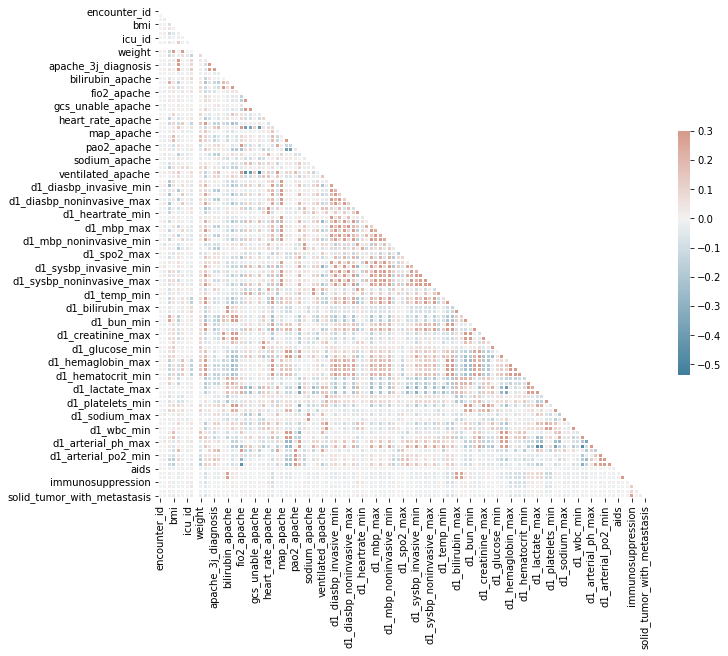

In [6]:
corr = train_x.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
# Not very helpful since its so big
c = corr.abs()
s = c.unstack()
corr_sort = s.sort_values(ascending=False)

print(corr_sort)

solid_tumor_with_metastasis  solid_tumor_with_metastasis    1.0
leukemia                     leukemia                       1.0
d1_inr_min                   d1_inr_min                     1.0
                             h1_inr_min                     1.0
d1_lactate_max               d1_lactate_max                 1.0
                                                           ... 
hepatic_failure              readmission_status             NaN
immunosuppression            readmission_status             NaN
leukemia                     readmission_status             NaN
lymphoma                     readmission_status             NaN
solid_tumor_with_metastasis  readmission_status             NaN
Length: 29929, dtype: float64


encounter_id                 encounter_id                   1.000000
                             hospital_id                    0.001378
                             age                            0.000976
                             bmi                            0.003809
                             elective_surgery               0.001602
                                                              ...   
solid_tumor_with_metastasis  hepatic_failure                0.006155
                             immunosuppression              0.272218
                             leukemia                       0.008341
                             lymphoma                       0.016385
                             solid_tumor_with_metastasis    1.000000
Length: 29929, dtype: float64
